In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

## Load Dataset and perform some opeartions on it 

In [2]:
dataset=pd.read_csv("ad_click_dataset.csv")

In [3]:
dataset.head(2)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1


In [4]:
dataset.drop(['id' ,'full_name'] , axis=1 , inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5234 non-null   float64
 1   gender            5307 non-null   object 
 2   device_type       8000 non-null   object 
 3   ad_position       8000 non-null   object 
 4   browsing_history  5218 non-null   object 
 5   time_of_day       8000 non-null   object 
 6   click             10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [6]:
dataset.describe()

,age,click
count,5234.000000,10000.000000
mean,40.197363,0.650000
std,13.126420,0.476993
min,18.000000,0.000000
25%,29.000000,0.000000
50%,39.500000,1.000000
75%,52.000000,1.000000
max,64.000000,1.000000


In [7]:
dataset['age']=dataset['age'].fillna(dataset['age'].mean())

In [8]:
for i in dataset.select_dtypes('object'):
    dataset[i]=dataset[i].fillna(dataset[i].mode()[0])

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.shape

(3563, 7)

## Data Visualization

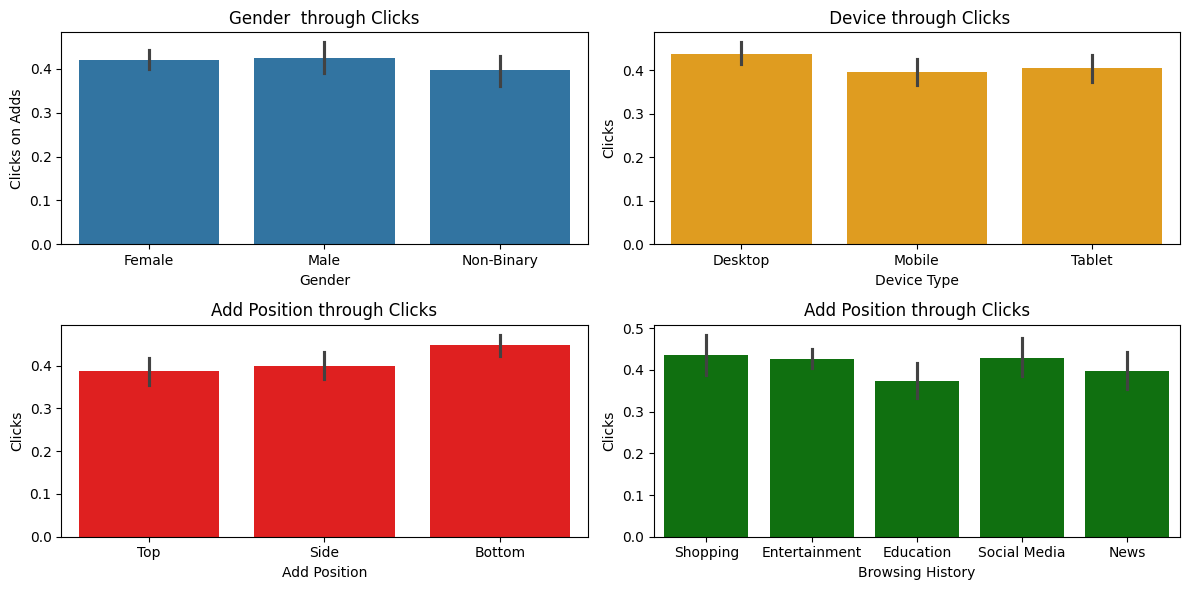

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(data=dataset , x="gender" , y='click')
plt.xlabel("Gender")
plt.ylabel("Clicks on Adds")
plt.title("Gender  through Clicks")


plt.subplot(2,2,2)
sns.barplot(data=dataset , x="device_type" , y='click' , color='orange')
plt.xlabel("Device Type")
plt.ylabel("Clicks")
plt.title(" Device through Clicks")

plt.subplot(2,2,3)
sns.barplot(data=dataset , x="ad_position" , y='click' , color='red')
plt.xlabel("Add Position")
plt.ylabel("Clicks")
plt.title("Add Position through Clicks")
plt.tight_layout()

plt.subplot(2,2,4)
sns.barplot(data=dataset , x="browsing_history" , y='click' , color='green')
plt.xlabel("Browsing History")
plt.ylabel("Clicks")
plt.title("Add Position through Clicks")
plt.tight_layout()
plt.show()

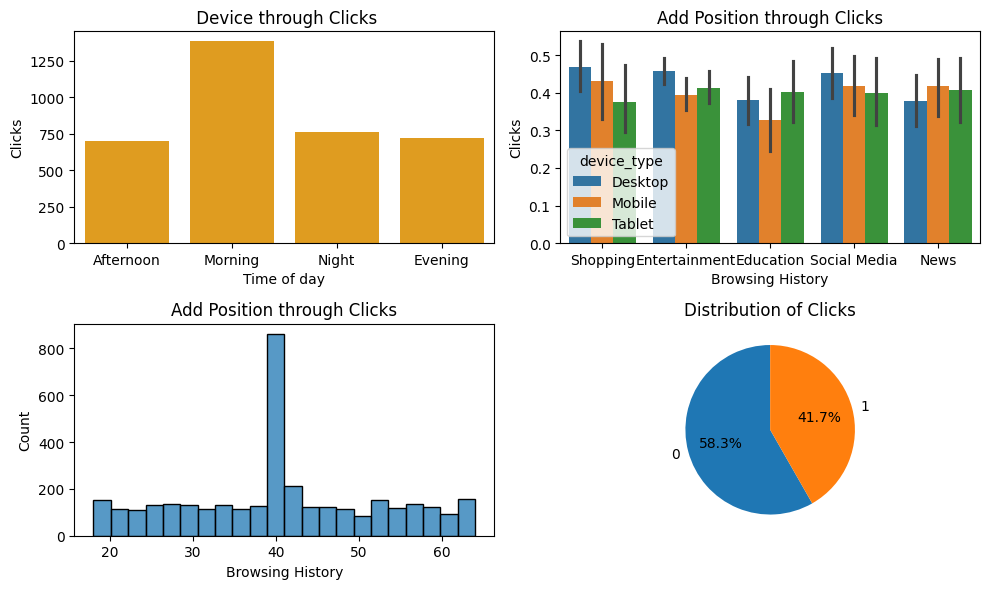

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(data=dataset , x="time_of_day"  , color='orange')
plt.xlabel("Time of day")
plt.ylabel("Clicks")
plt.title(" Device through Clicks")
plt.subplot(2,2,2)
sns.barplot(data=dataset , x="browsing_history" ,y='click' , hue='device_type')
plt.xlabel("Browsing History")
plt.ylabel("Clicks")
plt.title("Add Position through Clicks")
plt.tight_layout()

plt.subplot(2,2,3)
click_counts = dataset['click'].value_counts()
sns.histplot(data=dataset , x="age")
plt.xlabel("Browsing History")
plt.title("Add Position through Clicks")
plt.tight_layout()
plt.subplot(2,2,4)
plt.pie(click_counts,labels=click_counts.index, autopct='%1.1f%%',startangle=90)

plt.title("Distribution of Clicks")
plt.tight_layout()
plt.show()

## Encoding the categorial Variables in Dataset

In [13]:
dataset_ad=pd.get_dummies(dataset)

In [14]:
dataset_ad.head()

,age,click,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.000000,1,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False
1,40.197363,1,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,41.000000,1,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,34.000000,1,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
4,39.000000,0,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False


In [15]:
input_data=dataset_ad.drop("click" , axis=1)
output=dataset_ad['click']

In [16]:
from imblearn.over_sampling import RandomOverSampler #to balanced inbalanced data
Ros=RandomOverSampler()
ro_x,ro_y=Ros.fit_resample(input_data,output)

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test=train_test_split(ro_x ,ro_y , test_size=0.2 ,random_state=42 , stratify=ro_y)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose  import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),[0])
    ],
    remainder='passthrough'  # This is the key part!
)

In [25]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [40]:
base_Learners=[
    ("Lr" ,RandomForestClassifier(random_state=42,n_estimators=100)),
    ("Dtr" , DecisionTreeClassifier(random_state=42)),
    ("Svm" , KNeighborsClassifier())
]

In [41]:
meta_learner=LogisticRegression(max_iter=1000)

In [42]:
Classifer=StackingClassifier(
    estimators=base_Learners,
    final_estimator=meta_learner,
    cv=5
)

In [43]:
Classifer.fit(X_train ,y_train)

,estimators,"[('Lr', ...), ('Dtr', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [44]:
Classifer.score(X_test,y_test)*100

62.8158844765343

In [45]:
from xgboost import XGBClassifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier

In [47]:
XG_model=GradientBoostingClassifier(n_estimators=100 ,random_state=42)
XG_model.fit(X_train ,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [48]:
XG_model.score(X_test,y_test)*100

59.205776173285194

In [49]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [50]:
ada.score(X_test,y_test)*100

56.438026474127554

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3,
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_
print("Score with best model:", best_xgb_model.score(X_test, y_test) * 100)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Score with best model: 64.74127557160048


In [51]:
Xg=XGBClassifier()
Xg.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
Xg.score(X_test,y_test)*100

65.94464500601684

In [53]:
from sklearn.metrics import classification_report
print("CLassification Reports")
classification_report(y_test , Xg.predict(X_test))

CLassification Reports


'              precision    recall  f1-score   support\n\n           0       0.69      0.58      0.63       416\n           1       0.64      0.74      0.69       415\n\n    accuracy                           0.66       831\n   macro avg       0.66      0.66      0.66       831\nweighted avg       0.66      0.66      0.66       831\n'

C:\Users\zesha\AppData\Local\Temp\ipykernel_5056\4023130727.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy (%)', y='Model', data=scores_df.sort_values('Accuracy (%)', ascending=False), palette='viridis')


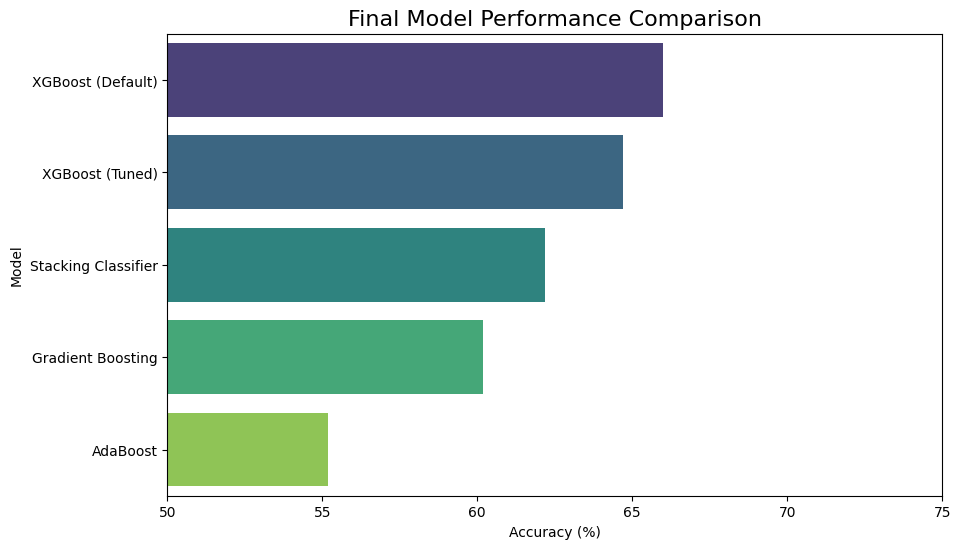

In [55]:
# Create a dictionary with your final scores
model_scores = {
    'XGBoost (Default)': 66.0,
    'XGBoost (Tuned)': 64.7,
    'Stacking Classifier': 62.2,
    'Gradient Boosting': 60.2,
    'AdaBoost': 55.2
}

# Convert to a DataFrame for easy plotting
scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy (%)'])

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy (%)', y='Model', data=scores_df.sort_values('Accuracy (%)', ascending=False), palette='viridis')

plt.title('Final Model Performance Comparison', fontsize=16)
plt.xlim(50, 75) # Adjust x-axis to better show differences
plt.show()